In [1]:
import Bio

print(Bio.__version__)

1.83


In [12]:
from Bio import SeqIO

fasta_file = './raw/test.fasta'

sequences = SeqIO.parse(fasta_file, 'fasta')

print(sequences)

In [13]:
for sequence in sequences:
    print(sequence.id)
    print(sequence.seq)

test
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC


In [14]:
fasta_file = './raw/test2.fasta'

sequences = SeqIO.parse(fasta_file, 'fasta')

for sequence in sequences:
    print(sequence.id)
    print(sequence.seq)

test1
ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC
test2
TAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC


In [18]:
# count 하기

fasta_file = './raw/test.fasta'

sequences = SeqIO.parse(fasta_file, 'fasta')
data =dict()
for sequence in sequences:
    for base in sequence.seq:
        if base not in data:
            data[base] = 0
        data[base] +=1

print(data)

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
seq_df = pd.DataFrame(
    {
        'base':data.keys(),
        'counts': data.values()
    }
)

print(seq_df)

{'A': 41, 'T': 44, 'G': 22, 'C': 33}
  base  counts
0    A      41
1    T      44
2    G      22
3    C      33


(array([0, 1, 2, 3]),
 [Text(0, 0, 'A'), Text(1, 0, 'T'), Text(2, 0, 'G'), Text(3, 0, 'C')])

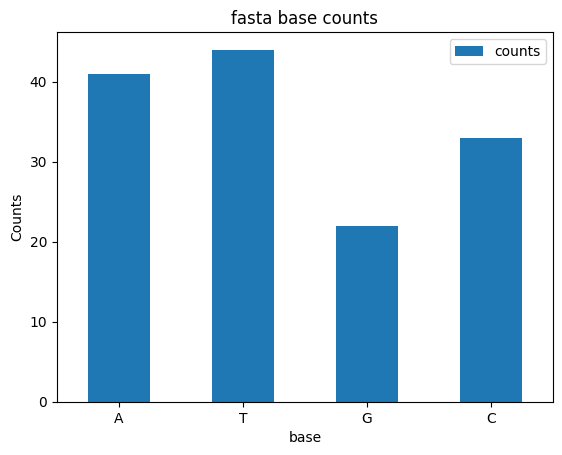

In [19]:
seq_df.plot(
    x='base', y='counts', 
    kind="bar",
    title="fasta base counts",
    ylabel="Counts",
) 
plt.xticks(rotation=0)


In [22]:
# 2개 샘플 count 하기

fasta_file = './raw/test2.fasta'

sequences = SeqIO.parse(fasta_file, 'fasta')
data_all = list()
for sequence in sequences:
    data =dict()
    for base in sequence.seq:
        if base not in data:
            data[base] = 0
        data[base] +=1
    data_all.append(data)

print(data_all)


df_base ={'base':data_all[0].keys()}

for i, data in enumerate(data_all): # 인덱스-요소 매칭
    print(i, data)
    df_base[f'count{i}'] = [data['A'],data['T'],data['G'],data['C'] ] # 딕셔너리 생성 

print(df_base)
df = pd.DataFrame(df_base) # 데이터 프레임 생성할 수 있는 구조

df

[{'A': 41, 'T': 44, 'G': 22, 'C': 33}, {'T': 40, 'A': 29, 'C': 33, 'G': 38}]
0 {'A': 41, 'T': 44, 'G': 22, 'C': 33}
1 {'T': 40, 'A': 29, 'C': 33, 'G': 38}
{'base': dict_keys(['A', 'T', 'G', 'C']), 'count0': [41, 44, 22, 33], 'count1': [29, 40, 38, 33]}


,base,count0,count1
0,A,41,29
1,T,44,40
2,G,22,38
3,C,33,33


In [33]:
# 2개 샘플 count 하기 - sort

fasta_file = './raw/test2.fasta'

sequences = SeqIO.parse(fasta_file, 'fasta')
data_all = list()
for sequence in sequences:
    data =dict()
    for base in sequence.seq:
        if base not in data:
            data[base] = 0
        data[base] +=1
    data_all.append(dict(sorted(data.items())))

print(data_all)


seq_df = pd.DataFrame(
    {
        'base':data_all[0].keys(),
        'count1': data_all[0].values(),
        'count2': data_all[1].values(),
    }
)
seq_df


[{'A': 41, 'C': 33, 'G': 22, 'T': 44}, {'A': 29, 'C': 33, 'G': 38, 'T': 40}]


,base,count1,count2
0,A,41,29
1,C,33,33
2,G,22,38
3,T,44,40


(array([0, 1, 2, 3]),
 [Text(0, 0, 'A'), Text(1, 0, 'T'), Text(2, 0, 'G'), Text(3, 0, 'C')])

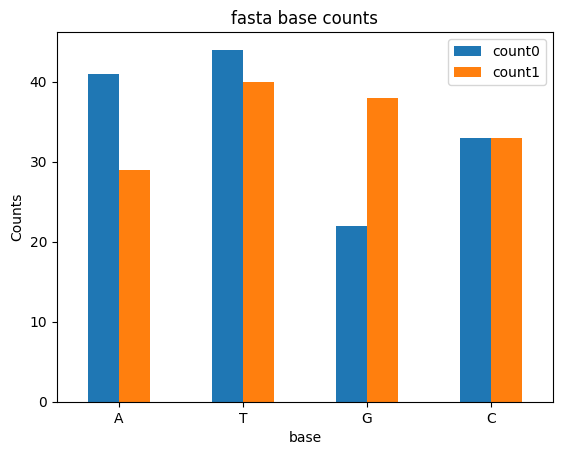

In [23]:
df.plot(
    x='base',
    kind="bar",
    title="fasta base counts",
    ylabel="Counts",
) 
plt.xticks(rotation=0)

In [24]:
# 3개 샘플 count 하기

fasta_file = './raw/test3.fasta'

sequences = SeqIO.parse(fasta_file, 'fasta')
data_all = list()
for sequence in sequences:
    data =dict()
    for base in sequence.seq:
        if base not in data:
            data[base] = 0
        data[base] +=1
    data_all.append(data)

print(data_all)


df_base ={'base':data_all[0].keys()}

for i, data in enumerate(data_all): # 인덱스-요소 매칭
    print(i, data)
    df_base[f'count{i}'] = [data['A'],data['T'],data['G'],data['C'] ] # 딕셔너리 생성 

print(df_base)
df = pd.DataFrame(df_base) # 데이터프레임 만들 수 있는 딕셔너리 구조 


[{'A': 41, 'T': 44, 'G': 22, 'C': 33}, {'T': 40, 'A': 29, 'C': 33, 'G': 38}, {'C': 33, 'T': 37, 'G': 38, 'A': 32}]
0 {'A': 41, 'T': 44, 'G': 22, 'C': 33}
1 {'T': 40, 'A': 29, 'C': 33, 'G': 38}
2 {'C': 33, 'T': 37, 'G': 38, 'A': 32}
{'base': dict_keys(['A', 'T', 'G', 'C']), 'count0': [41, 44, 22, 33], 'count1': [29, 40, 38, 33], 'count2': [32, 37, 38, 33]}


(array([0, 1, 2, 3]),
 [Text(0, 0, 'A'), Text(1, 0, 'T'), Text(2, 0, 'G'), Text(3, 0, 'C')])

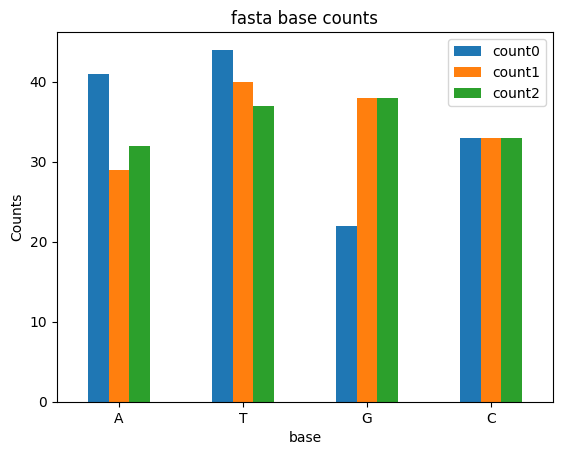

In [25]:
df.plot(
    x='base',
    kind="bar",
    title="fasta base counts",
    ylabel="Counts",
)  #y를 모두 주면 됨(입력 안할 시 )
plt.xticks(rotation=0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'A'), Text(1, 0, 'T'), Text(2, 0, 'G'), Text(3, 0, 'C')])

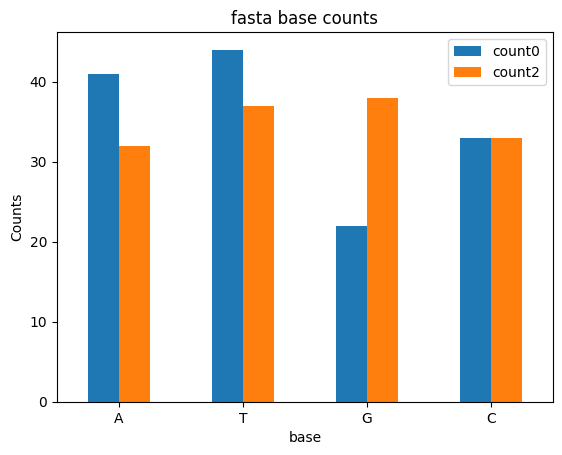

In [27]:
df.plot(
    x='base', y=['count0','count2'],
    kind="bar",
    title="fasta base counts",
    ylabel="Counts",
)  #y를 모두 주면 됨(입력 안할 시 )
plt.xticks(rotation=0)

In [28]:
### gene bank 읽기


fasta_file = './raw/NC_045512.gb'

sequences = SeqIO.parse(fasta_file, 'genbank')

data =dict()
for sequence in sequences:
    for base in sequence.seq:
        if base not in data:
            data[base] = 0
        data[base] +=1


print(data)


seq_df = pd.DataFrame(
    {
        'base':data.keys(),
        'counts': data.values()
    }
)

print(seq_df)



{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}
  base  counts
0    A    8954
1    T    9594
2    G    5863
3    C    5492


(array([0, 1, 2, 3]),
 [Text(0, 0, 'A'), Text(1, 0, 'T'), Text(2, 0, 'G'), Text(3, 0, 'C')])

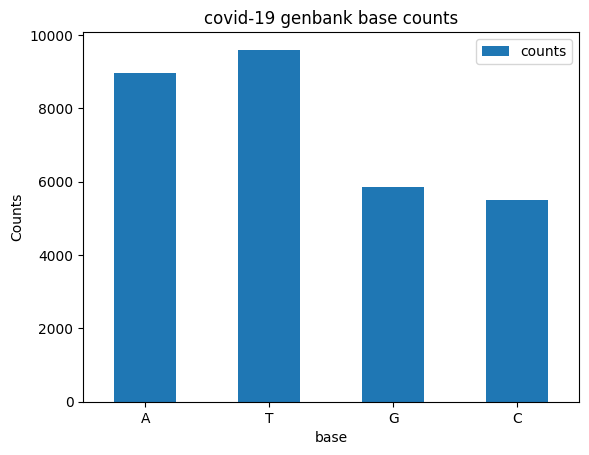

In [30]:
seq_df.plot(
    x='base', y='counts',
    kind="bar",
    title="covid-19 genbank base counts",
    ylabel="Counts",
)  
plt.xticks(rotation=0)